In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [3]:
data_steam = pd.read_csv('datasets/data_outputs.csv')
df_recommend = pd.read_csv('datasets/df_usersrecommend.csv')
df_playtime = pd.read_csv('datasets/df_playtimegenre.csv')

WORD CLOUD -- TITULOS

In [41]:
title = data_steam['title']

In [45]:
titulos = ' '.join(data_steam['title'].astype(str))

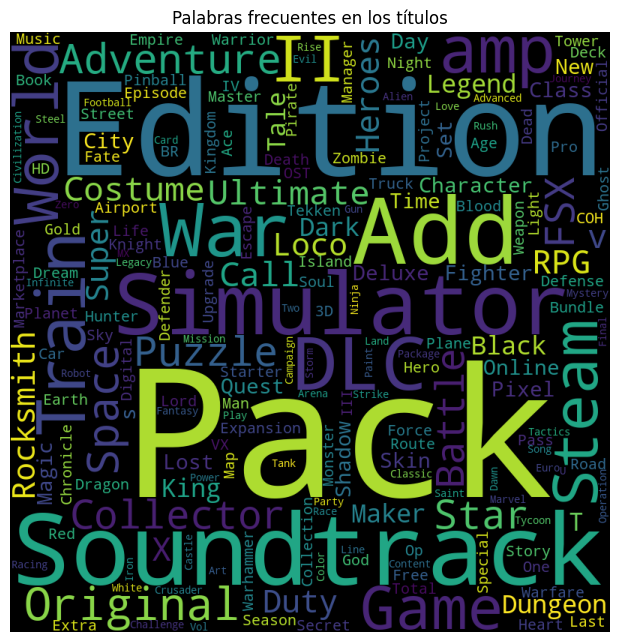

In [50]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black', collocations=False,
                min_font_size = 10).generate(titulos)
 
                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Palabras frecuentes en los títulos')
 
plt.show()

<p>JUEGOS RECOMENDADOS POR AÑO</p>
<P>Difiere de la función Users Recommend porque no se contempla la columna sentiment_analysis</P>

<Figure size 1000x600 with 0 Axes>

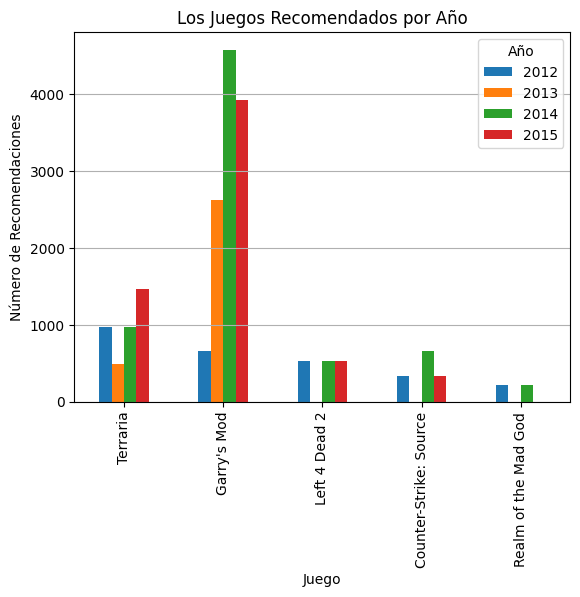

In [115]:
year = [2012, 2013, 2014, 2015]
data = df_recommend.groupby(['item_name','posted_year'])['recommend'].count().unstack().sort_values(by=year, ascending=False).head(5)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=False)
plt.title('Los Juegos Recomendados por Año')
plt.xlabel('Juego')
plt.ylabel('Número de Recomendaciones')
plt.grid(axis='y')

plt.legend(title='Año')
plt.show()

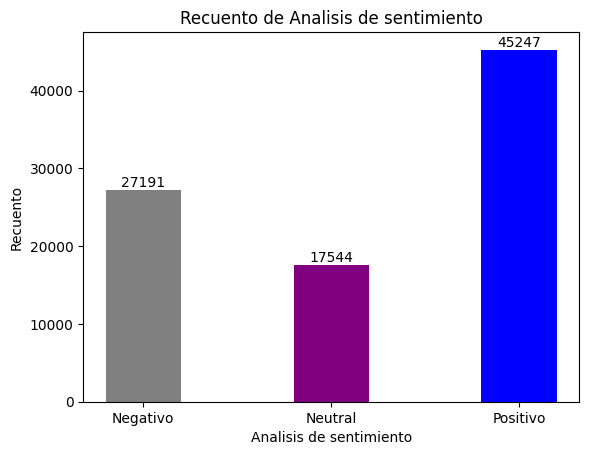

In [127]:
data = df_recommend['sentiment_analysis']

value_counts = data.value_counts()

negativo = value_counts.get(0) 
neutral = value_counts.get(1)   
positivo = value_counts.get(2) 

plt.bar(value_counts.index, value_counts.values, color=['blue','grey','purple'], width=0.4)

plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])


for i, valor in enumerate([negativo, neutral, positivo]):
    plt.text(i, valor, str(valor), ha='center', va='bottom')


plt.title('Recuento de Analisis de sentimiento')
plt.xlabel('Analisis de sentimiento')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()


In [4]:
df_playtime['genres'].unique()

array(['Action', 'RPG', 'Strategy', 'Adventure', 'Indie',
       'Massively Multiplayer', 'Simulation', 'Free to Play', 'Casual',
       'Early Access', 'Racing', 'Sports', 'Animation &amp; Modeling',
       'Video Production', 'Utilities'], dtype=object)